In [1]:
%cd /media/eel/DATAUbuntu/Projetos/Pub2023-2024/PortModels/

/media/eel/DATAUbuntu/Projetos/Pub2023-2024/PortModels


/media/eel/DATAUbuntu/Projetos/Pub2023-2024/PortModels/venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import pandas as pd
#from functions import *
import ipywidgets as widgets
from ipywidgets import interact, fixed, interact_manual
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
from pycaret.classification import *
from sklearn.metrics import confusion_matrix



In [3]:
dta0_01 = pd.read_csv('data/raw/jan2023.csv')
dta0_02 = pd.read_csv('data/raw/fev2023.csv')
dta0_03 = pd.read_csv('data/raw/mar2023.csv')
dta0_04 = pd.read_csv('data/raw/abr2023.csv')
dta0_05 = pd.read_csv('data/raw/mai2023.csv')
dta0_06 = pd.read_csv('data/raw/jun2023.csv')
dta0_07 = pd.read_csv('data/raw/jul2023.csv')
dta0_08 = pd.read_csv('data/raw/ago2023.csv')
dta0_09 = pd.read_csv('data/raw/set2023.csv')
dta0_10 = pd.read_csv('data/raw/out2023.csv')
dta0_11 = pd.read_csv('data/raw/nov2023.csv')
data0_0 = pd.read_csv('data/raw/dez2023.csv')
data0_1 = pd.read_csv('data/raw/jan2024.csv')
data0_2 = pd.read_csv('data/raw/fev2024.csv')
data0_3 = pd.read_csv('data/raw/mar2024.csv')
data0_4 = pd.read_csv('data/raw/abr2024.csv')
data0_5 = pd.read_csv('data/raw/mai2024.csv')

feat_drop = ['Nome do fundo','CNPJ do fundo','cnpj', 'Classe N1',
        'Patrimônio líquido', 'Cotistas', 'Valor da cota', 'Variação da Cota',
        'Drawdown máximo']

feat_dropt = ['Nome do fundo','cnpj', 'Classe N1',
        'Patrimônio líquido', 'Cotistas', 'Valor da cota', 'Variação da Cota',
        'Drawdown máximo']

cpj01 = dta0_01['CNPJ do fundo'].loc[ (dta0_01['Cotistas'] > 100) & (dta0_01['Classe N1'] == 'Ações')].values
cpj02 = dta0_02['CNPJ do fundo'].loc[ (dta0_02['Cotistas'] > 100) & (dta0_02['Classe N1'] == 'Ações')].values
cpj03 = dta0_03['CNPJ do fundo'].loc[ (dta0_03['Cotistas'] > 100) & (dta0_03['Classe N1'] == 'Ações')].values
cpj04 = dta0_04['CNPJ do fundo'].loc[ (dta0_04['Cotistas'] > 100) & (dta0_04['Classe N1'] == 'Ações')].values
cpj05 = dta0_05['CNPJ do fundo'].loc[ (dta0_05['Cotistas'] > 100) & (dta0_05['Classe N1'] == 'Ações')].values     
cpj06 = dta0_06['CNPJ do fundo'].loc[ (dta0_06['Cotistas'] > 100) & (dta0_06['Classe N1'] == 'Ações')].values     
cpj07 = dta0_07['CNPJ do fundo'].loc[ (dta0_07['Cotistas'] > 100) & (dta0_07['Classe N1'] == 'Ações')].values        
cpj08 = dta0_08['CNPJ do fundo'].loc[ (dta0_08['Cotistas'] > 100) & (dta0_08['Classe N1'] == 'Ações')].values        
cpj09 = dta0_09['CNPJ do fundo'].loc[ (dta0_09['Cotistas'] > 100) & (dta0_09['Classe N1'] == 'Ações')].values        
cpj10 = dta0_10['CNPJ do fundo'].loc[ (dta0_10['Cotistas'] > 100) & (dta0_10['Classe N1'] == 'Ações')].values        
cpj11 = dta0_11['CNPJ do fundo'].loc[ (dta0_11['Cotistas'] > 100) & (dta0_11['Classe N1'] == 'Ações')].values
cnpj0 = data0_0['CNPJ do fundo'].loc[ (data0_0['Cotistas'] > 100) & (data0_0['Classe N1'] == 'Ações')].values
cnpj1 = data0_1['CNPJ do fundo'].loc[ (data0_1['Cotistas'] > 100) & (data0_1['Classe N1'] == 'Ações')].values
cnpj2 = data0_2['CNPJ do fundo'].loc[ (data0_2['Cotistas'] > 100) & (data0_2['Classe N1'] == 'Ações')].values
cnpj3 = data0_3['CNPJ do fundo'].loc[ (data0_3['Cotistas'] > 100) & (data0_3['Classe N1'] == 'Ações')].values
cnpj4 = data0_4['CNPJ do fundo'].loc[ (data0_4['Cotistas'] > 100) & (data0_4['Classe N1'] == 'Ações')].values
cnpj5 = data0_5['CNPJ do fundo'].loc[ (data0_5['Cotistas'] > 100) & (data0_5['Classe N1'] == 'Ações')].values

set1 = set(cpj01)
set2 = set(cpj02)
matches01 = list(set1.intersection(set2))
dta01  = dta0_01.loc[dta0_01['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_02.loc[dta0_02['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta01 = dta01.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj02)
set2 = set(cpj03)
matches01 = list(set1.intersection(set2))
dta02  = dta0_02.loc[dta0_02['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_03.loc[dta0_03['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta02 = dta02.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj03)
set2 = set(cpj04)
matches01 = list(set1.intersection(set2))
dta03  = dta0_03.loc[dta0_03['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_04.loc[dta0_04['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta03 = dta03.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj04)
set2 = set(cpj05)
matches01 = list(set1.intersection(set2))
dta04  = dta0_04.loc[dta0_04['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_05.loc[dta0_05['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta04 = dta04.merge(rent1M, how='inner', on='CNPJ do fundo')


set1 = set(cpj05)
set2 = set(cpj06)
matches01 = list(set1.intersection(set2))
dta05  = dta0_05.loc[dta0_05['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_06.loc[dta0_06['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta05 = dta05.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj06)
set2 = set(cpj07)
matches01 = list(set1.intersection(set2))
dta06  = dta0_06.loc[dta0_06['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_07.loc[dta0_07['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta06 = dta06.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj07)
set2 = set(cpj08)
matches01 = list(set1.intersection(set2))
dta07  = dta0_07.loc[dta0_07['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_08.loc[dta0_08['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta07 = dta07.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj08)
set2 = set(cpj09)
matches01 = list(set1.intersection(set2))
dta08  = dta0_08.loc[dta0_08['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_09.loc[dta0_09['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta08 = dta08.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj09)
set2 = set(cpj10)
matches01 = list(set1.intersection(set2))
dta09  = dta0_09.loc[dta0_09['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_10.loc[dta0_10['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta09 = dta09.merge(rent1M, how='inner', on='CNPJ do fundo')
                
set1 = set(cpj10)
set2 = set(cpj11)
matches01 = list(set1.intersection(set2))
dta10  = dta0_10.loc[dta0_10['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_11.loc[dta0_11['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta10 = dta10.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj11)
set2 = set(cnpj0)
matches01 = list(set1.intersection(set2))
dta11  = dta0_11.loc[dta0_11['CNPJ do fundo'].isin(matches01)]
rent1M = data0_0.loc[data0_0['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta11 = dta11.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cnpj0)
set2 = set(cnpj1)
matches01 = list(set1.intersection(set2))
data0  = data0_0.loc[data0_0['CNPJ do fundo'].isin(matches01)]
rent1M = data0_1.loc[data0_1['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
data0 = data0.merge(rent1M, how='inner', on='CNPJ do fundo')


set1 = set(cnpj1)
set2 = set(cnpj2)
matches01 = list(set1.intersection(set2))
data1  = data0_1.loc[data0_1['CNPJ do fundo'].isin(matches01)]
rent1M = data0_2.loc[data0_2['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
data1 = data1.merge(rent1M, how='inner', on='CNPJ do fundo')


set1 = set(cnpj2)
set2 = set(cnpj3)
matches01 = list(set1.intersection(set2))
data2  = data0_2.loc[data0_2['CNPJ do fundo'].isin(matches01)]
rent1M = data0_3.loc[data0_3['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
data2 = data2.merge(rent1M, how='inner', on='CNPJ do fundo')

data = pd.concat([ dta01, dta02, dta03, dta04, dta05, dta06, dta07, dta08, dta09, dta10, dta11, data0, data1, data2], ignore_index=True)

In [4]:
data.dropna(axis=0, inplace=True)
data.drop(columns=feat_drop, inplace=True)
data.reset_index(drop=True, inplace=True)

data['Cluster'] = 0
data['Cluster'].loc[ data['Rentabilidade 1M'] < (data['Rentabilidade 1M'].mean() - 0.5*data['Rentabilidade 1M'].std())] = -1.0
data['Cluster'].loc[ data['Rentabilidade 1M'] > (data['Rentabilidade 1M'].mean() + 0.5*data['Rentabilidade 1M'].std())] =  1.0

data.drop(columns='Rentabilidade 1M', inplace=True)

In [5]:
data

,Rentabilidade No mês,Rentabilidade 3 meses,Rentabilidade 6 meses,Rentabilidade 12 meses,Rentabilidade 24 meses,Volatilidade No mês,Volatilidade 3 meses,Volatilidade 6 meses,Volatilidade 12 meses,Volatilidade 24 meses,...,Índice de sortino 120 meses,Information Ratio 36 meses,Information Ratio 48 meses,Information Ratio 60 meses,Information Ratio 120 meses,Índice de Treynor 36 meses,Índice de Treynor 48 meses,Índice de Treynor 60 meses,Índice de Treynor 120 meses,Cluster
0,0.045134,-0.117370,0.050586,-0.070121,-0.227474,0.190753,0.228272,0.204698,0.196921,0.216315,...,0.116079,-0.455287,0.329760,0.266957,0.210171,-0.075142,0.054027,0.046860,0.062370,-1
1,0.047141,-0.012793,0.068865,0.291692,0.992360,0.408596,0.404824,0.434350,0.396246,0.410766,...,0.065527,0.659993,0.420368,0.453069,0.136915,0.166551,0.098733,0.107923,0.030779,-1
2,0.046392,-0.014381,0.065438,0.283348,0.967376,0.408141,0.404529,0.434264,0.396307,0.410787,...,0.061409,0.638095,0.397610,0.429924,0.132156,0.161023,0.093387,0.102419,0.029766,-1
3,0.047704,-0.013920,0.066603,0.285244,0.970398,0.409088,0.405237,0.434668,0.396849,0.411428,...,0.063579,0.640010,0.400717,0.433043,0.134170,0.161618,0.094179,0.103239,0.030248,-1
4,0.047510,-0.010284,0.068547,0.287934,0.975874,0.408691,0.405568,0.435969,0.398081,0.411653,...,0.073128,0.644709,0.404274,0.436656,0.144700,0.162762,0.094991,0.104080,0.032563,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4965,0.008526,0.009829,0.090006,0.219506,0.126052,0.147027,0.132832,0.146756,0.159573,0.190037,...,-0.010572,-5.824441,-6.920392,-7.881623,-9.556912,-0.014855,-0.015750,-0.016251,-0.015647,0
4966,-0.001198,0.005155,0.073624,0.158917,-0.214027,0.128773,0.124416,0.138134,0.152219,0.185158,...,-0.556252,-3.069346,-2.154561,-1.990746,-1.864686,-0.233362,-0.175200,-0.149357,-0.128372,0
4967,0.006550,0.002418,0.069846,0.198901,0.096558,0.147057,0.135088,0.147830,0.155002,0.184016,...,-0.068669,-0.828622,-0.981528,-0.723521,-0.767332,-0.038746,-0.045864,-0.032310,-0.027204,0
4968,0.007336,0.004868,0.075214,0.211160,0.119807,0.146854,0.134897,0.147623,0.154768,0.183797,...,-0.007760,-0.583304,-0.742787,-0.469042,-0.439997,-0.027400,-0.034859,-0.021036,-0.015656,0


In [6]:
s = setup(data, target = 'Cluster', session_id=123, transformation = True, transformation_method='quantile', train_size=0.8)

,Description,Value
0,Session id,123
1,Target,Cluster
2,Target type,Multiclass
3,Target mapping,"-1: 0, 0: 1, 1: 2"
4,Original data shape,"(4970, 73)"
5,Transformed data shape,"(4970, 73)"
6,Transformed train set shape,"(3976, 73)"
7,Transformed test set shape,"(994, 73)"
8,Numeric features,72
9,Preprocess,True


In [7]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9218,0.9855,0.9218,0.9225,0.9217,0.8818,0.8822,475.7920
rf,Random Forest Classifier,0.9160,0.9850,0.9160,0.9170,0.9161,0.8731,0.8735,0.2760
et,Extra Trees Classifier,0.9142,0.9851,0.9142,0.9150,0.9142,0.8704,0.8708,0.1670
gbc,Gradient Boosting Classifier,0.8903,0.0000,0.8903,0.8910,0.8901,0.8344,0.8349,2.7670
qda,Quadratic Discriminant Analysis,0.8627,0.0000,0.8627,0.8638,0.8627,0.7928,0.7933,0.1300
knn,K Neighbors Classifier,0.8599,0.9560,0.8599,0.8634,0.8598,0.7881,0.7898,0.3050
dt,Decision Tree Classifier,0.8436,0.8812,0.8436,0.8445,0.8436,0.7636,0.7640,0.1590
lr,Logistic Regression,0.8081,0.0000,0.8081,0.8083,0.8074,0.7105,0.7112,0.4540
ridge,Ridge Classifier,0.7965,0.0000,0.7965,0.7977,0.7955,0.6939,0.6954,0.1290
lda,Linear Discriminant Analysis,0.7892,0.0000,0.7892,0.7902,0.7884,0.6828,0.6840,0.1350


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [8]:
rf = create_model('lightgbm')
#rf = tune_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9246,0.9882,0.9246,0.9246,0.9246,0.8863,0.8863
1,0.9271,0.9865,0.9271,0.9282,0.9270,0.8897,0.8902
2,0.9422,0.9903,0.9422,0.9420,0.9421,0.9128,0.9128
3,0.8995,0.9799,0.8995,0.9025,0.8995,0.8476,0.8492
4,0.9196,0.9869,0.9196,0.9200,0.9192,0.8788,0.8794
5,0.9196,0.9867,0.9196,0.9208,0.9199,0.8784,0.8787
6,0.9370,0.9859,0.9370,0.9372,0.9369,0.9048,0.9049
7,0.9244,0.9855,0.9244,0.9260,0.9247,0.8857,0.8862
8,0.9043,0.9780,0.9043,0.9042,0.9041,0.8556,0.8557


In [53]:
#trf = tune_model('lightgbm')

TypeError: The behavior of tune_model in version 1.0.1 is changed. Please pass trained model object.

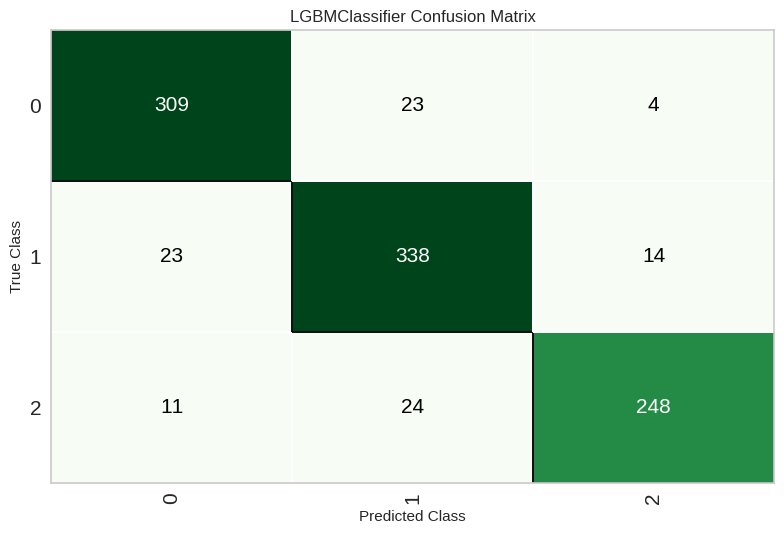

In [24]:
plot_model(rf, plot = 'confusion_matrix')

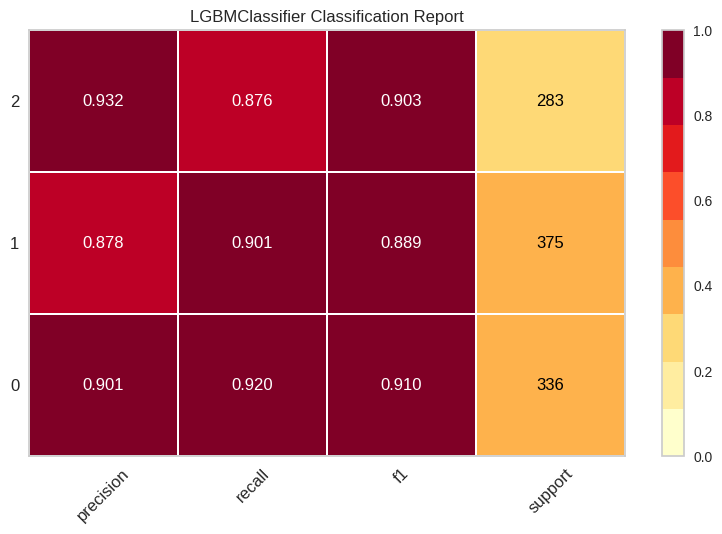

In [25]:
plot_model(rf, plot = 'class_report')

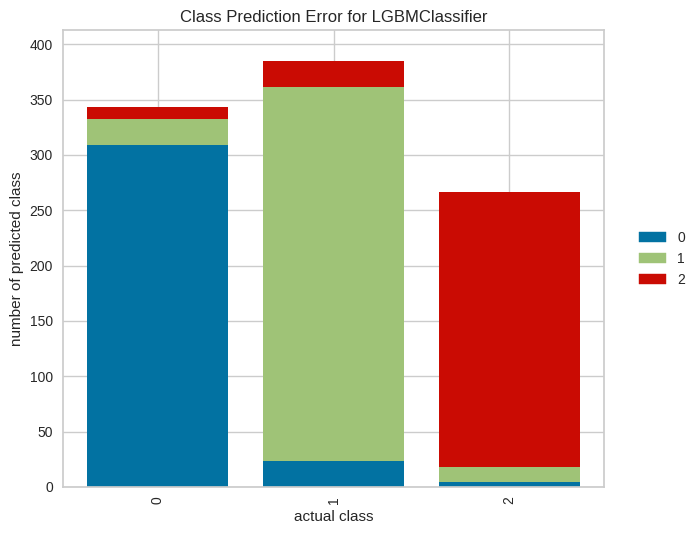

In [26]:
plot_model(rf, plot = 'error')

In [40]:
set1 = set(cnpj3)
set2 = set(cnpj4)
matches01 = list(set1.intersection(set2))
data3  = data0_3.loc[data0_3['CNPJ do fundo'].isin(matches01)]
rent1M = data0_4.loc[data0_4['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
data3 = data3.merge(rent1M, how='inner', on='CNPJ do fundo')
data3.dropna(axis=0, inplace=True)
                
data_unseen = data3
data_unseen.drop(columns=feat_dropt, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)
#data_unseen.drop(columns='Rentabilidade 1M', inplace=True)

In [41]:
data_teste = data_unseen
data_teste['Cluster'] = 0
data_teste['Cluster'].loc[ data_teste['Rentabilidade 1M'] < (data_teste['Rentabilidade 1M'].mean() - 0.5*data_teste['Rentabilidade 1M'].std())] = -1.0
data_teste['Cluster'].loc[ data_teste['Rentabilidade 1M'] > (data_teste['Rentabilidade 1M'].mean() + 0.5*data_teste['Rentabilidade 1M'].std())] =  1.0
#data_teste['Cluster'].hist()
# data_teste.loc[data_teste['Cluster'] == 1].index

# data_unseen.drop(columns='Rentabilidade 1M', inplace=True)
unseen_predictions = predict_model(rf, data=data_unseen)
confusion_matrix(data_teste['Cluster'], unseen_predictions['prediction_label'],labels=[-1,0,1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.5726,0.6858,0.5726,0.5374,0.5397,0.2519,0.2639


array([[ 23,  87,   0],
       [ 10, 158,  18],
       [ 38,   3,  28]])

In [52]:
unseen_predictions[['Rentabilidade 1M', 'Rentabilidade No mês']].loc[unseen_predictions['prediction_label'] == 1]

,Rentabilidade 1M,Rentabilidade No mês
4,-0.032884,-0.017744
6,0.039042,-0.051544
7,0.039030,-0.052418
8,0.036093,-0.048794
9,0.038467,-0.052491
11,0.038574,-0.051713
14,0.038563,-0.050535
60,0.038936,-0.052484
61,0.038892,-0.052506
63,0.038794,-0.052607


In [30]:
set1 = set(cnpj4)
set2 = set(cnpj5)
matches01 = list(set1.intersection(set2))
data4  = data0_4.loc[data0_4['CNPJ do fundo'].isin(matches01)]
rent1M = data0_5.loc[data0_5['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
data4 = data4.merge(rent1M, how='inner', on='CNPJ do fundo')
data4.dropna(axis=0, inplace=True)

data_unseen = data4

data_unseen.drop(columns=feat_dropt, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)
#data_unseen.drop(columns='Rentabilidade 1M', inplace=True)

In [31]:
data_teste = data_unseen
data_teste['Cluster'] = 0
data_teste['Cluster'].loc[ data_teste['Rentabilidade 1M'] < (data_teste['Rentabilidade 1M'].mean() - 0.5*data_teste['Rentabilidade 1M'].std())] = -1.0
data_teste['Cluster'].loc[ data_teste['Rentabilidade 1M'] > (data_teste['Rentabilidade 1M'].mean() + 0.5*data_teste['Rentabilidade 1M'].std())] =  1.0
#data_teste['Cluster'].hist()
# data_teste.loc[data_teste['Cluster'] == 1].index

data_unseen.drop(columns='Rentabilidade 1M', inplace=True)
unseen_predictions = predict_model(rf, data=data_unseen)
confusion_matrix(data_teste['Cluster'], unseen_predictions['prediction_label'],labels=[-1,0,1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.3507,0.5112,0.3507,0.2763,0.3055,-0.0383,-0.0397


array([[  7,  58,  49],
       [ 17, 119,  24],
       [ 48,  41,   2]])

In [32]:
unseen_predictions.loc[unseen_predictions['prediction_label'] == 1]

,CNPJ do fundo,Rentabilidade No mês,Rentabilidade 3 meses,Rentabilidade 6 meses,Rentabilidade 12 meses,Rentabilidade 24 meses,Volatilidade No mês,Volatilidade 3 meses,Volatilidade 6 meses,Volatilidade 12 meses,...,Information Ratio 48 meses,Information Ratio 60 meses,Information Ratio 120 meses,Índice de Treynor 36 meses,Índice de Treynor 48 meses,Índice de Treynor 60 meses,Índice de Treynor 120 meses,Cluster,prediction_label,prediction_score
3,3919493000156,0.184861,0.075807,0.233281,0.892302,1.414284,0.230610,0.327599,0.283454,0.295077,...,1.416417,0.743662,0.325469,0.564444,0.345762,0.173856,0.073286,-1,1,0.9638
5,4435076000109,-0.032884,-0.045912,0.069067,0.124539,0.013331,0.123789,0.120748,0.129065,0.145721,...,-1.674715,-1.229532,-0.235199,-0.058728,-0.070719,-0.055777,-0.016214,0,1,0.5544
7,4350787000172,-0.066897,-0.062596,0.029115,0.027167,-0.203277,0.160340,0.149014,0.168474,0.176981,...,-1.478125,-0.995250,-0.403505,-0.156341,-0.155036,-0.104461,-0.044634,-1,1,0.6420
13,3929711000133,0.184373,0.076471,0.233488,0.892205,1.408833,0.229933,0.326358,0.282402,0.293939,...,1.421889,0.747683,0.313565,0.567088,0.346981,0.174544,0.070375,-1,1,0.9659
14,3904236000140,0.183760,0.074961,0.230113,0.881764,1.380689,0.229923,0.326351,0.282434,0.293974,...,1.390915,0.722554,0.307667,0.557954,0.339426,0.168678,0.069186,-1,1,0.9708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,6234268000174,-0.066850,-0.062595,0.029102,0.027239,-0.203226,0.160263,0.148953,0.168417,0.176944,...,-1.476574,-0.994120,-0.381314,-0.156283,-0.154853,-0.104300,-0.042176,-1,1,0.6420
334,8323402000139,-0.059400,-0.048384,0.087546,0.259969,-0.104551,0.168231,0.151309,0.176134,0.185023,...,-0.843711,-0.368240,-0.053581,-0.154124,-0.117073,-0.050854,-0.008848,0,1,0.4793
336,9635172000106,-0.042451,-0.053467,0.071551,0.123402,0.039061,0.151549,0.134857,0.143689,0.151914,...,-1.014013,-0.642744,-0.133674,-0.093400,-0.062045,-0.037121,-0.007970,-1,1,0.6128
354,47177431000191,-0.041331,-0.084505,-0.028011,-0.073178,-0.480443,0.153618,0.131242,0.133374,0.143178,...,-4.176262,-3.137946,-3.103621,-0.360946,-0.308345,-0.241781,-0.224066,-1,1,0.8120


In [18]:
# data_unseen

In [19]:
# unseen_predictions = predict_model(rf, data=data_unseen)
# unseen_predictions.loc[unseen_predictions['prediction_label'] == 1]


In [20]:
# unseen_predictions.iloc[data_teste.loc[data_teste['Cluster'] == 1].index]

In [21]:
# abs(unseen_predictions['prediction_label']-data_teste['Cluster']).plot(figsize=(25,5))

In [22]:
#(data['Volatilidade No mês'].loc[ data['CNPJ do fundo'] == 8336054000134 ]).plot()
# data['Volatilidade 6 meses'].loc[ data['CNPJ do fundo'] == 8336054000134 ].plot()
#data['Volatilidade 3 meses'].loc[ data['CNPJ do fundo'] == 8336054000134 ].plot()

In [23]:
# data.loc[ data['CNPJ do fundo'] == 8336054000134 ]


In [54]:
final_rf = finalize_model(rf)

In [55]:
print(final_rf)

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Rentabilidade No mês',
                                             'Rentabilidade 3 meses',
                                             'Rentabilidade 6 meses',
                                             'Rentabilidade 12 meses',
                                             'Rentabilidade 24 meses',
                                             'Volatilidade No mês',
                                             'Volatili...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_de

In [56]:
predict_model(final_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Rentabilidade No mês,Rentabilidade 3 meses,Rentabilidade 6 meses,Rentabilidade 12 meses,Rentabilidade 24 meses,Volatilidade No mês,Volatilidade 3 meses,Volatilidade 6 meses,Volatilidade 12 meses,Volatilidade 24 meses,...,Information Ratio 48 meses,Information Ratio 60 meses,Information Ratio 120 meses,Índice de Treynor 36 meses,Índice de Treynor 48 meses,Índice de Treynor 60 meses,Índice de Treynor 120 meses,Cluster,prediction_label,prediction_score
678,-0.076840,-0.064250,-0.081651,-0.080123,-0.110418,0.167583,0.203007,0.230485,0.208962,0.196331,...,-0.599355,-0.331785,-0.664979,-0.045030,-0.028885,-0.014735,-0.026713,-1,-1,0.9935
929,-0.052477,-0.063623,0.016531,-0.104839,-0.190233,0.138181,0.139437,0.154893,0.172326,0.171036,...,0.041551,-0.019923,-0.089190,-0.102707,0.010390,-0.004982,-0.024788,0,0,0.9410
3148,0.000336,0.004053,0.124966,0.075920,0.102709,0.099338,0.103583,0.110588,0.126774,0.137593,...,0.329881,0.268604,0.328092,0.027182,0.061807,0.049552,0.071108,-1,-1,0.7725
3746,0.123899,0.058299,0.132321,0.137794,0.040228,0.172201,0.180334,0.162818,0.185861,0.214497,...,-0.709032,-0.570806,-0.281404,-0.096645,-0.068562,-0.050548,-0.034690,1,1,0.9864
754,-0.029260,-0.075748,-0.082936,-0.159568,-0.246214,0.187306,0.187809,0.215406,0.211843,0.206747,...,-0.991762,-0.600468,-0.677898,-0.091584,-0.061236,-0.037893,-0.064508,0,0,0.9798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,-0.003778,-0.089448,-0.130699,-0.119609,-0.352267,0.244830,0.231380,0.243428,0.243879,0.232639,...,0.146128,0.284286,0.318878,-0.061607,0.018321,0.036645,0.055577,1,1,0.9886
2443,-0.038270,0.081424,0.237657,0.153884,0.180226,0.130055,0.139392,0.150791,0.181290,0.189678,...,0.799358,0.990198,0.510832,0.063362,0.087942,0.117689,0.104673,0,0,0.9918
3286,-0.051790,-0.097735,0.109708,-0.132097,-0.056380,0.245408,0.207208,0.192187,0.237064,0.256525,...,-0.309882,-0.064978,-0.077183,-0.070641,-0.037813,-0.007326,-0.009370,1,1,0.9851
1236,0.000090,-0.100136,-0.126633,-0.044267,-0.171356,0.196344,0.180948,0.202360,0.213863,0.208024,...,-0.462983,-0.344932,0.016328,-0.024260,-0.036504,-0.025499,0.001341,1,1,0.9540


In [57]:
set1 = set(cnpj3)
set2 = set(cnpj4)
matches01 = list(set1.intersection(set2))
data3  = data0_3.loc[data0_3['CNPJ do fundo'].isin(matches01)]
rent1M = data0_4.loc[data0_4['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
data3 = data3.merge(rent1M, how='inner', on='CNPJ do fundo')
data3.dropna(axis=0, inplace=True)
                
data_unseen = data3
data_unseen.drop(columns=feat_dropt, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)
#data_unseen.drop(columns='Rentabilidade 1M', inplace=True)

In [58]:
data_teste = data_unseen
data_teste['Cluster'] = 0
data_teste['Cluster'].loc[ data_teste['Rentabilidade 1M'] < (data_teste['Rentabilidade 1M'].mean() - 0.5*data_teste['Rentabilidade 1M'].std())] = -1.0
data_teste['Cluster'].loc[ data_teste['Rentabilidade 1M'] > (data_teste['Rentabilidade 1M'].mean() + 0.5*data_teste['Rentabilidade 1M'].std())] =  1.0
#data_teste['Cluster'].hist()
# data_teste.loc[data_teste['Cluster'] == 1].index

# data_unseen.drop(columns='Rentabilidade 1M', inplace=True)
unseen_predictions = predict_model(final_rf, data=data_unseen)
confusion_matrix(data_teste['Cluster'], unseen_predictions['prediction_label'],labels=[-1,0,1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.5671,0.6317,0.5671,0.5332,0.5396,0.2565,0.2651


array([[ 23,  86,   1],
       [ 14, 148,  24],
       [ 30,   3,  36]])

In [59]:
set1 = set(cnpj4)
set2 = set(cnpj5)
matches01 = list(set1.intersection(set2))
data4  = data0_4.loc[data0_4['CNPJ do fundo'].isin(matches01)]
rent1M = data0_5.loc[data0_5['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
data4 = data4.merge(rent1M, how='inner', on='CNPJ do fundo')
data4.dropna(axis=0, inplace=True)

data_unseen = data4

data_unseen.drop(columns=feat_dropt, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)
#data_unseen.drop(columns='Rentabilidade 1M', inplace=True)

In [60]:
data_teste = data_unseen
data_teste['Cluster'] = 0
data_teste['Cluster'].loc[ data_teste['Rentabilidade 1M'] < (data_teste['Rentabilidade 1M'].mean() - 0.5*data_teste['Rentabilidade 1M'].std())] = -1.0
data_teste['Cluster'].loc[ data_teste['Rentabilidade 1M'] > (data_teste['Rentabilidade 1M'].mean() + 0.5*data_teste['Rentabilidade 1M'].std())] =  1.0
#data_teste['Cluster'].hist()
# data_teste.loc[data_teste['Cluster'] == 1].index

data_unseen.drop(columns='Rentabilidade 1M', inplace=True)
unseen_predictions = predict_model(final_rf, data=data_unseen)
confusion_matrix(data_teste['Cluster'], unseen_predictions['prediction_label'],labels=[-1,0,1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.3589,0.5010,0.3589,0.2556,0.2951,-0.0366,-0.0391


array([[  3,  64,  47],
       [ 10, 127,  23],
       [ 45,  45,   1]])

In [61]:
save_model(final_rf,'Final lightgbm Model 27Jun2024')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Rentabilidade No mês',
                                              'Rentabilidade 3 meses',
                                              'Rentabilidade 6 meses',
                                              'Rentabilidade 12 meses',
                                              'Rentabilidade 24 meses',
                                              'Volatilidade No mês',
                                              'Volatili...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_